In [1]:
%load_ext autoreload
%autoreload 2

%load_ext dotenv
%dotenv ../.env.local

In [2]:
from anthropic import Anthropic

import os
from pathlib import Path
import json

from utils import get_base64_encoded_image, build_few_shot_message_list, parse_xml_response

In [3]:
client = Anthropic(
    api_key=os.environ.get('ANTHROPIC_API_KEY'),
)

MODEL_NAME = "claude-3-5-sonnet-20240620"

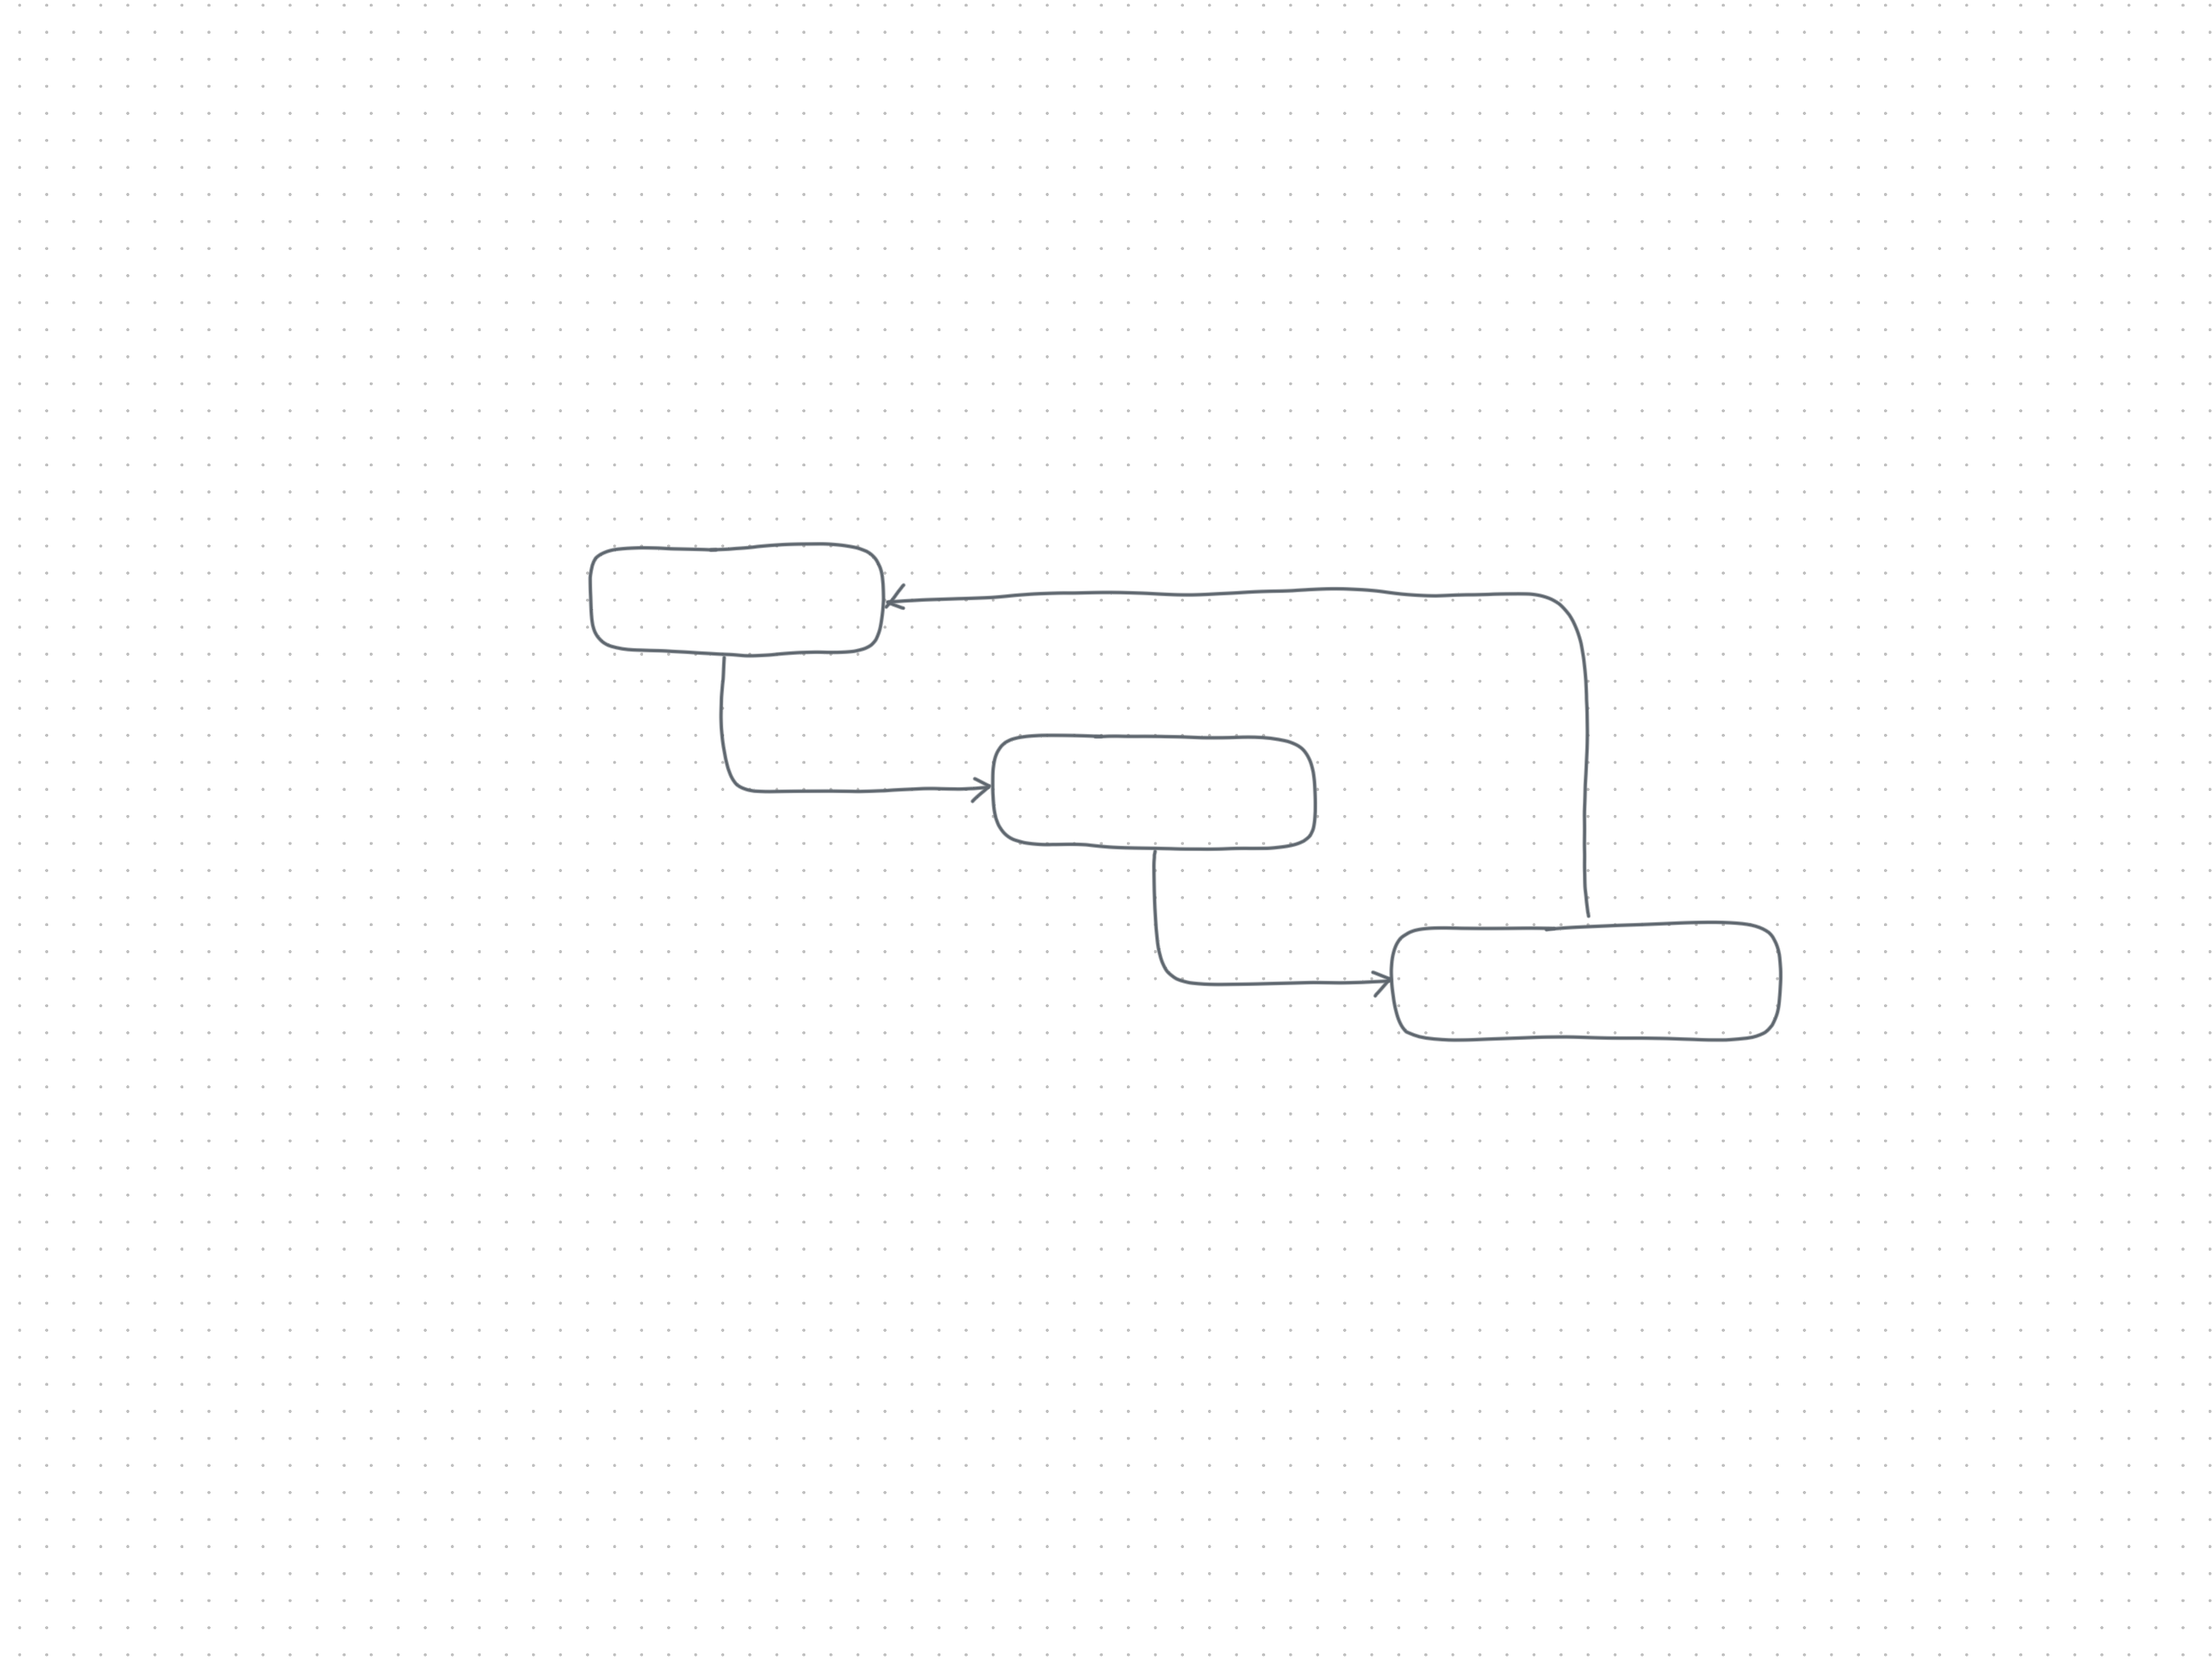

In [20]:
from IPython.display import Image

IMAGE_FILE = '../data/images/shapes-5.png'

Image(filename=IMAGE_FILE) 

In [21]:
system_prompt = '''You are a expert technical diagram converter. 
Your task is to create a JSON Canvas diagram from a handwritten sketch.
Start by creating lists of nodes and edges based on the sketch writing out your thoughts as you go.
At this stage, you don't need to transcibe the text in the nodes, just identify the nodes and edges in the sketch.
All nodes must have a "type" of "text" and a "text" value of "".
Rectangles represent nodes.
Lines represent edges.
Edges are not always straight lines, they can bend and curve multiple times.
Pay extra attention to the direction of the arrows in the sketch. The start of the arrow represents the "fromNode" and the wider end of the arrow represents the "toNode".
EVERY node has a color must be specified in the node's JSON object as follows:
<colors>
Black or gray: {"type":"text", ... }
Red: {"type":"text", ... , "color":"1"}
Orange: {"type":"text", ... , "color":"2"}
Yellow: {"type":"text", ... , "color":"3"}
Green: {"type":"text", ... , "color":"4"}
Blue: {"type":"text", ... , "color":"5"}
Purple: {"type":"text", ... , "color":"6"}
</colors>
'''

example_image = '../data/images/scaled/colors.png'
example_canvas = '''{
	"nodes":[
		{"id":"node1","type":"text","text":"","x":203,"y":81,"width":25,"height":43,"color":"4"},
		{"id":"node2","type":"text","text":"","x":122,"y":101,"width":33,"height":27},
		{"id":"node3","type":"text","text":"","x":155,"y":151,"width":52,"height":59,"color":"6"}
	],
	"edges":[
		{"id":"edge1","fromNode":"node1","fromSide":"top","toNode":"node2","toSide":"top"},
		{"id":"edge2","fromNode":"node3","fromSide":"top","toNode":"node1","toSide":"left"},
		{"id":"edge3","fromNode":"node2","fromSide":"bottom","toNode":"node3","toSide":"left"}
	]
}
'''

message_list = build_few_shot_message_list(IMAGE_FILE, example_image, example_canvas)

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    system=system_prompt,
    messages=message_list,
	temperature=0.0,
)
print(response.content[0].text)

obsidian_vault = Path(os.environ.get('OBSIDIAN_VAULT'))
output_name = Path(IMAGE_FILE).stem
output_file = obsidian_vault / f'{output_name}.canvas'

with open(output_file, 'w') as f:
    json_data = parse_xml_response(response)
    f.write(json.dumps(json_data, indent=4))

print(f'\nCanvas saved to {output_file}')

Certainly! I'll analyze the sketch and create a JSON Canvas diagram based on it. Let me walk you through my thought process:

1. I can see three rectangular nodes arranged in a diagonal pattern from top-left to bottom-right.
2. There are arrows connecting these nodes, forming a cycle.
3. All elements appear to be in black or gray, so no special color coding is needed.

Now, let's create the JSON Canvas representation:

<canvas>
{
  "nodes": [
    {
      "id": "node1",
      "type": "text",
      "text": "",
      "x": 100,
      "y": 100,
      "width": 120,
      "height": 60
    },
    {
      "id": "node2",
      "type": "text",
      "text": "",
      "x": 250,
      "y": 200,
      "width": 120,
      "height": 60
    },
    {
      "id": "node3",
      "type": "text",
      "text": "",
      "x": 400,
      "y": 300,
      "width": 120,
      "height": 60
    }
  ],
  "edges": [
    {
      "id": "edge1",
      "fromNode": "node1",
      "toNode": "node2",
      "fromSide": "bot